In [2]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [3]:
# Load the trained model 
model = torch.load('./EETExp/weights.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [4]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('./EETExp/log.csv')

### Training and testing loss, f1_score and auroc values for the model trained on the CrackForest dataset

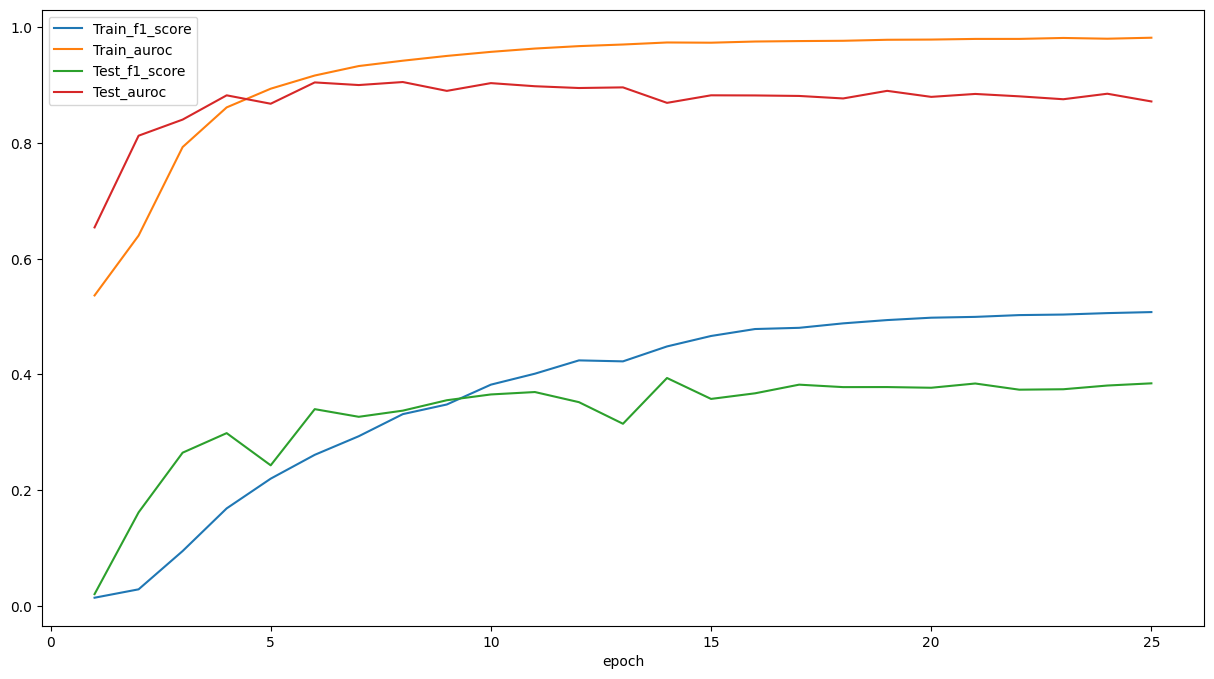

In [8]:
# Plot all the values with respect to the epochs
df.plot(x='epoch', y=['Train_f1_score', 'Train_auroc', 'Test_f1_score', 'Test_auroc'],figsize=(15,8));

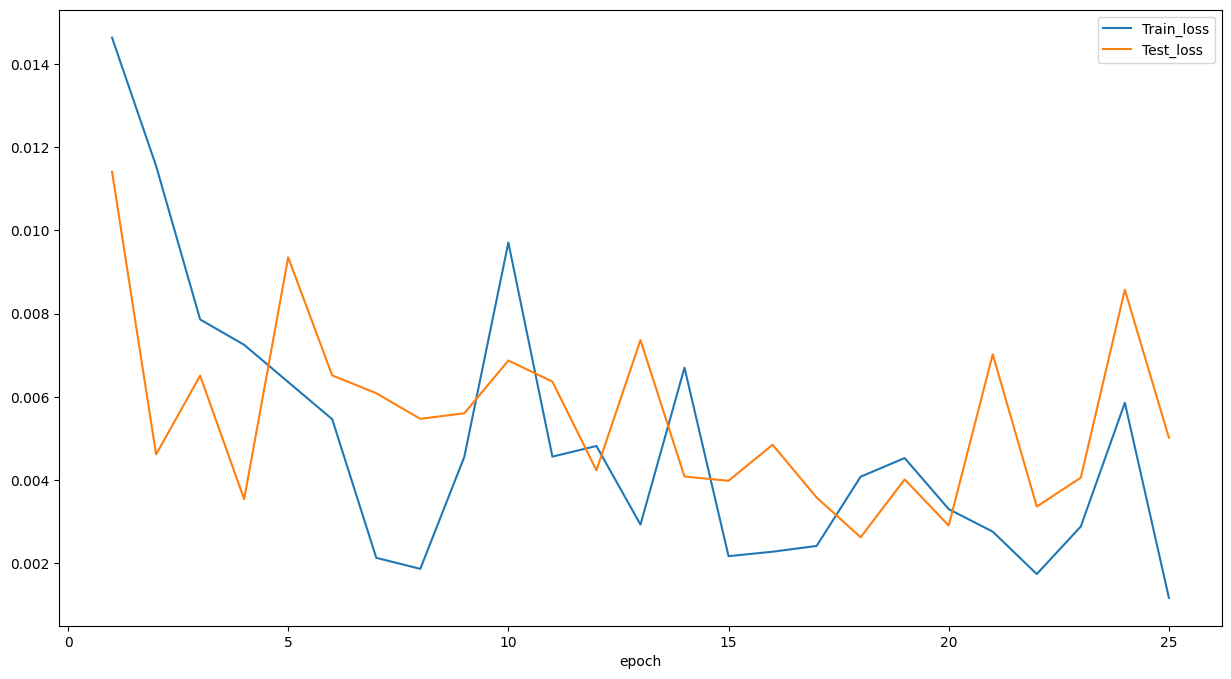

In [7]:
df.plot(x='epoch', y=['Train_loss', 'Test_loss'],figsize=(15,8));

In [6]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.981998
Test_auroc     0.905414
dtype: float64


### Sample Prediction

In [31]:
ino = 2
# Read  a sample image and mask from the data-set
# img = cv2.imread(r'')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = img.transpose(2,0,1).reshape(1,3,228,480)
# mask = cv2.imread(r'')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([2.26000e+02, 1.07245e+05, 1.22400e+03, 2.77000e+02, 1.72000e+02,
        1.12000e+02, 6.90000e+01, 5.00000e+01, 3.80000e+01, 2.70000e+01]),
 array([-0.19761938, -0.09166954,  0.01428031,  0.12023015,  0.22617999,
         0.33212984,  0.43807968,  0.54402953,  0.64997935,  0.75592923,
         0.86187905], dtype=float32),
 <BarContainer object of 10 artists>)

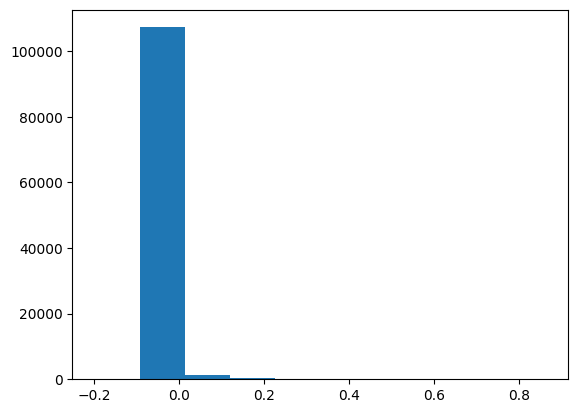

In [16]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

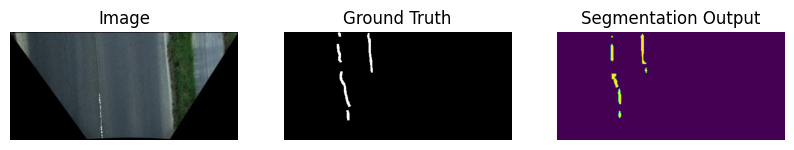

In [36]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.5);
plt.title('Segmentation Output')
plt.axis('off');
# plt.savefig('./EETExp/SegmentationOutput.png',bbox_inches='tight')

In [58]:
import numpy as np
output = np.zeros((228, 480, 3))
test = (a['out'].cpu().detach().numpy()[0][0]>.5).astype(int) * 255
output[:,:,0] = test
output[:,:,1] = test
output[:,:,2] = test

cv2.imwrite('test.png', output)

True